In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Loading the data into Dataframe
uber = pd.read_csv("C:/Users/admin/Downloads/Uber Request Data.csv")
uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [10]:
# make sure that number of duplicate rows are zero
sum(uber.duplicated(subset = "Request id")) == 0

True

##### let's look at the dimensions of the dataframe

In [11]:
uber.shape

(6745, 6)

##### check for NA values in dataset

In [12]:
print (uber.isnull().sum())  
print (uber.isnull().values.any())
print (uber.isnull().values.sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64
True
6564


In [13]:
uber.isnull().sum()*100/uber.shape[0] 

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [56]:
uber.head(10)

,Request id,Pickup_point,Driver id,Status,Request timestamp,Drop timestamp,Request_Date,Request_Hour,Drop Date,Drop_Hour,Part_ofthe_day,Gap
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-11-07 13:00:00,2016-07-11,11,2016-11-07,13,Afternoon,Supply
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-11-07 18:47:00,2016-07-11,17,2016-11-07,18,Evening,Supply
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-12-07 09:58:00,2016-07-12,9,2016-12-07,9,Morning,Supply
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-12-07 22:03:00,2016-07-12,21,2016-12-07,22,Night,Supply
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,2016-07-13,9,Morning,Supply
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21,2016-07-13,22,Night,Supply
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,6,2016-07-14,7,Early morning,Supply
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,5,2016-07-15,6,Early morning,Supply
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17,2016-07-15,18,Evening,Supply
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-11-07 07:25:00,2016-07-11,6,2016-11-07,7,Early morning,Supply


#### Data cleansing

In [15]:
# changing the timestamp format and loading data into new column (i.e Request timestamp,Drop timestamp) and changing the datatypes

#['Driver id'] = uber['Driver id'].astype(object).replace(np.nan, None)

uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'],dayfirst=True)
uber['Request_Date'] = uber['Request timestamp'].apply(lambda x:x.date())
uber['Request_Hour']= uber['Request timestamp'].apply(lambda x:x.hour)

uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'])
uber['Drop Date'] = uber['Drop timestamp'].apply(lambda x:x.date())
uber['Drop_Hour'] = uber['Drop timestamp'].apply(lambda x:x.hour)
uber['Drop_Hour'] = uber['Drop_Hour'].astype(object).replace('NaN', None)
uber.rename(columns={'Pickup point' : 'Pickup_point'}, inplace = True)



In [16]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
Request id           6745 non-null int64
Pickup_point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Request_Date         6745 non-null object
Request_Hour         6745 non-null int64
Drop Date            2831 non-null object
Drop_Hour            2831 non-null object
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 527.0+ KB


### Data Visuvilization

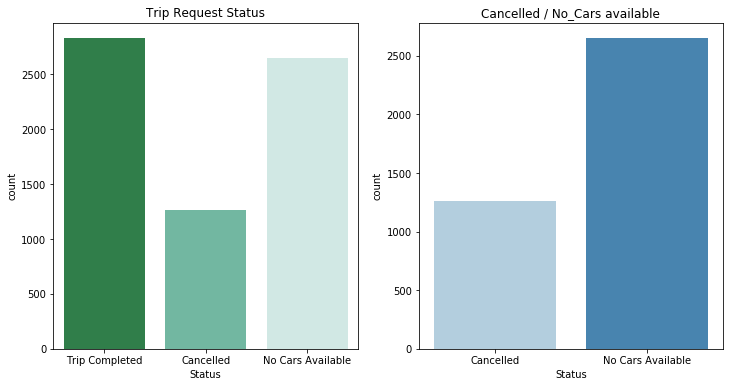

In [17]:
# Plotting Frequency of request and its response 

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Trip Request Status")
plt.xlabel('Trip Status')
plt.ylabel('Frequency')
sns.countplot(x='Status', data = uber, palette="BuGn_r")
plt.xticks(rotation=0)

# Plotting Frequency of request and its response only for 'Cancelled and No cars available'

plt.subplot(1,2,2)
plt.title("Cancelled / No_Cars available")
plt.xlabel('Trip Status')
plt.ylabel('Frequency')
uber_frequency = uber[(uber.Status == 'Cancelled') | (uber.Status == 'No Cars Available')]
sns.countplot(x='Status', data = uber_frequency, palette = "Blues")
plt.xticks(rotation=0)
plt.show()

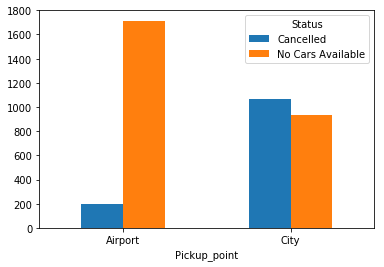

In [18]:
# Identifying Problemetic type of request(i.e city to airport/airport to city)

uber_freq = uber_frequency.groupby(['Pickup_point','Status']).size().unstack(fill_value=0).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

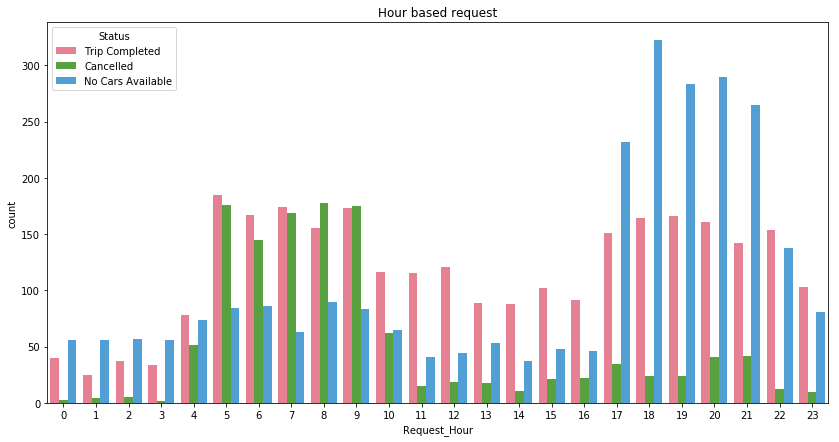

In [53]:
# Hourly based request status (i.e cancelled/no cars available)

plt.figure(figsize=(14,7))
plt.title("Hour based request")
sns.countplot(x='Request_Hour', hue = 'Status', data = uber,  palette="husl")
plt.show()

<Figure size 1008x504 with 0 Axes>

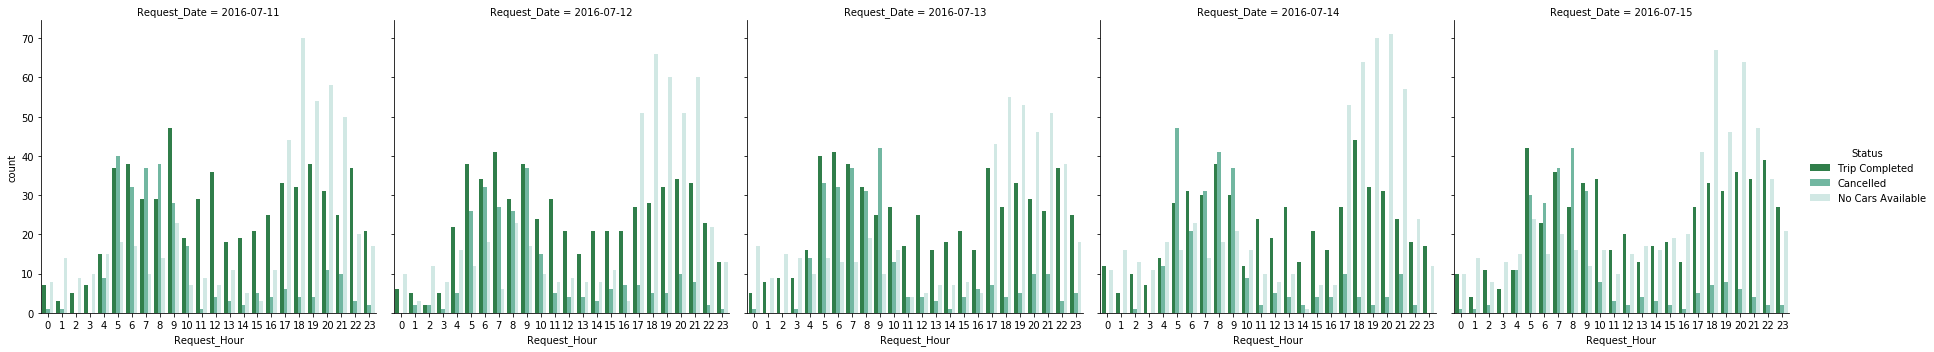

In [62]:
# Request hour w.r.t independent of the day's
plt.figure(figsize=(14,7))
sns.catplot(x='Request_Hour', kind='count', col='Request_Date',hue='Status', data=uber, 
            palette="BuGn_r")
plt.show()

#sns.factorplot(x = "Request_Hour", hue = "Status", row = "Request_Date", data = uber, kind = "count")

<Figure size 1008x504 with 0 Axes>

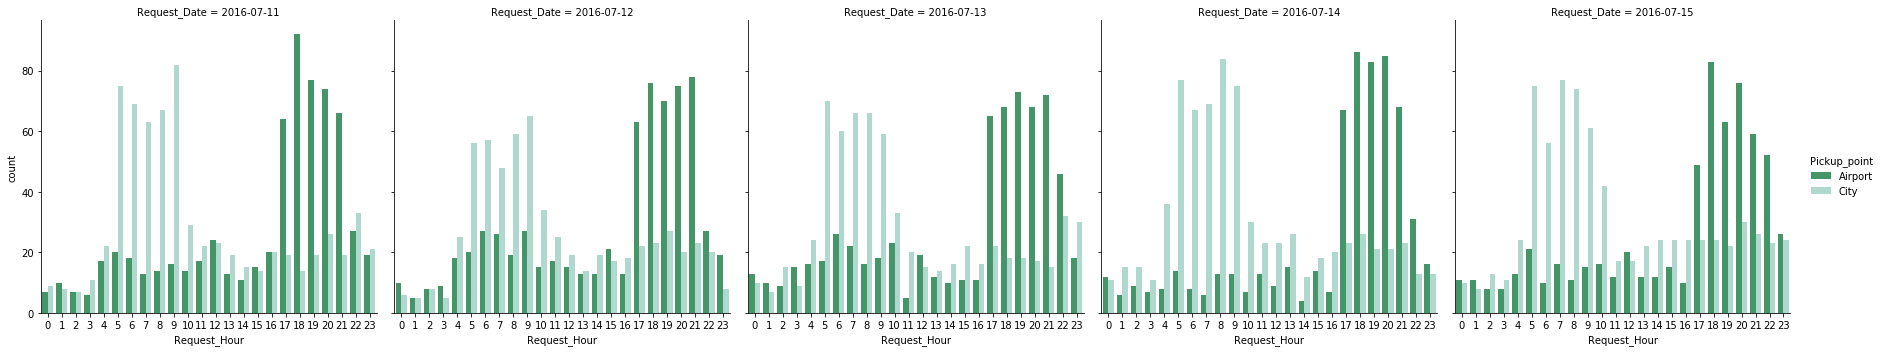

In [65]:
# Request hour w.r.t independent of the day's
plt.figure(figsize=(14,7))
sns.catplot(x='Request_Hour', kind='count', col='Request_Date',hue='Pickup_point', data=uber, 
            palette="BuGn_r")
plt.show()

In [36]:
#creating derived metrics for time slots i.e time period of the day

uber['Part_ofthe_day'] = 'Late Nights'
uber.loc[uber['Request_Hour'].between(4,7, inclusive=True),'Part_ofthe_day'] = 'Early morning'
uber.loc[uber['Request_Hour'].between(8,11, inclusive=True),'Part_ofthe_day'] = 'Morning'
uber.loc[uber['Request_Hour'].between(11,15, inclusive=True),'Part_ofthe_day'] = 'Afternoon'
uber.loc[uber['Request_Hour'].between(16,19, inclusive=True),'Part_ofthe_day'] = 'Evening'
uber.loc[uber['Request_Hour'].between(20,23, inclusive=True),'Part_ofthe_day'] = 'Night'


In [41]:
uber['Part_ofthe_day'].value_counts()

Evening          1560
Early morning    1452
Night            1439
Morning          1097
Afternoon         822
Late Nights       375
Name: Part_ofthe_day, dtype: int64

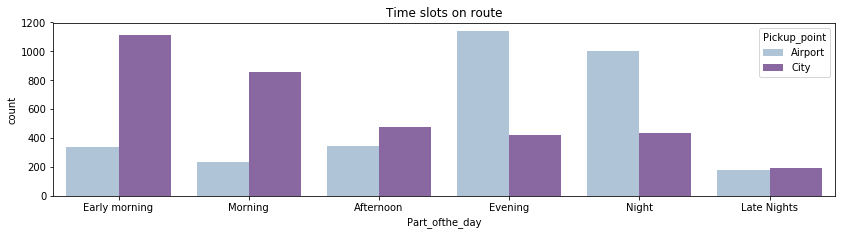

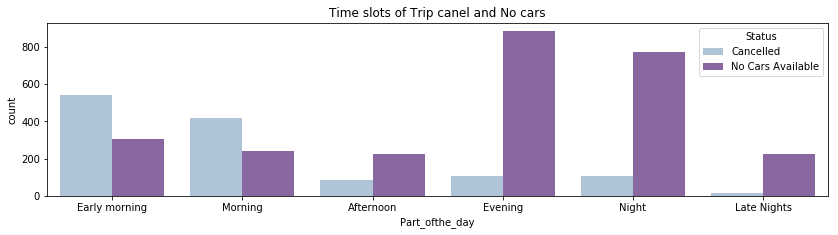

In [42]:
# Time slots on route(i.e Airport-city, city-airport)

plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.title("Time slots on route")
sns.countplot(x='Part_ofthe_day', hue = 'Pickup_point', data = uber,  palette="BuPu",
              order=['Early morning', 'Morning','Afternoon','Evening','Night','Late Nights'])
plt.xticks(rotation=0)
plt.show()

# Time slots on Trip 

plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.title("Time slots of Trip canel and No cars")
uber_trip = uber[(uber.Status == 'Cancelled') | (uber.Status == 'No Cars Available')]
sns.countplot(x='Part_ofthe_day', hue = 'Status', data = uber_trip,  palette="BuPu",
              order=['Early morning', 'Morning','Afternoon','Evening','Night','Late Nights'])
plt.xticks(rotation=0)
plt.show()

In [66]:
# severity of problem by location and their count (cancellation of cab as per the pickup location @Morning Rush)
    
df_morning_rush = uber[uber.Part_ofthe_day == "Morning"]
airport_cancelled  = df_morning_rush.loc[(df_morning_rush["Pickup_point"] == "Airport") & (df_morning_rush["Status"] == "Cancelled")]
len(airport_cancelled.index)

19

In [67]:
airport_cancelled  = df_morning_rush.loc[(df_morning_rush["Pickup_point"] == "City") & (df_morning_rush["Status"] == "Cancelled")]
len(airport_cancelled.index)

396

In [70]:
city_completed_morning_rush = df_morning_rush.loc[(df_morning_rush["Pickup_point"] == "City") & (df_morning_rush["Status"] == "Trip Completed")]
len(city_completed_morning_rush.index)

250

In [71]:
city_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup_point"] == "City")]
len(city_morning_rush.index)

860

In [72]:
# Suuply and Demand (Identifying time slots when the highest gap exists)

# creating derived metrics to find the Gap 
uber['Gap'] = uber['Status'].apply(lambda x : 'Supply' if x == 'Trip Completed' else 'Demand')

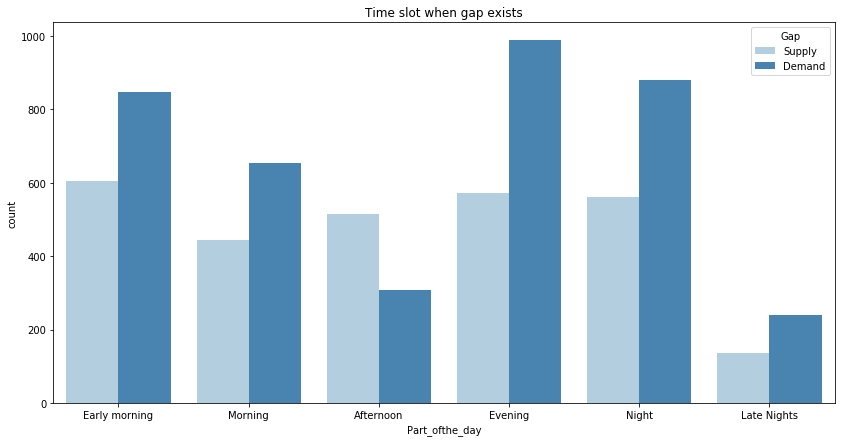

In [73]:
# plotting  suuply/demand w.r.t time slots

plt.figure(figsize=(14,7))
plt.title("Time slot when gap exists")
sns.countplot(x='Part_ofthe_day', hue = 'Gap', data = uber,  palette="Blues",
             order=['Early morning', 'Morning','Afternoon','Evening','Night','Late Nights'])
plt.show()

In [74]:
# Supply Vs Demand 

uber['Gap'].value_counts()

Demand    3914
Supply    2831
Name: Gap, dtype: int64

In [110]:
# Indetifying overall supply-demand w.r.t pickuppoint

supply_demand =uber[['Part_ofthe_day','Pickup_point', 'Gap']]
supply_demand = supply_demand.groupby(["Part_ofthe_day", "Gap","Pickup_point"]).size()
supply_demand

Part_ofthe_day  Gap     Pickup_point
Afternoon       Demand  Airport         106
                        City            201
                Supply  Airport         236
                        City            279
Early morning   Demand  Airport          59
                        City            789
                Supply  Airport         277
                        City            327
Evening         Demand  Airport         864
                        City            124
                Supply  Airport         276
                        City            296
Late Nights     Demand  Airport         114
                        City            125
                Supply  Airport          67
                        City             69
Morning         Demand  Airport          43
                        City            610
                Supply  Airport         194
                        City            250
Night           Demand  Airport         725
                        City           

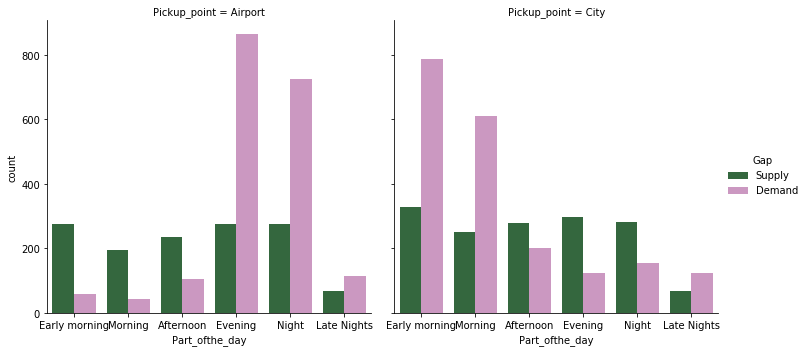

In [80]:
# Identifying supply and demand w.r.t timeslots of the day

sns.catplot(x='Part_ofthe_day', kind='count', col='Pickup_point',hue='Gap', data=uber, 
            palette="cubehelix", order=['Early morning', 'Morning','Afternoon','Evening','Night','Late Nights'])
#plt.xticks(rotation=90)
plt.show()